In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [19]:
df = pd.read_csv("/content/bi.csv", encoding="latin1")
df.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,HighSchool,130,74.0,50
3,Shoni,Hlongwane,22,F,Rsa,Sognsvann,40,High School,120,NaN,44
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,High School,122,91.0,80


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fNAME          77 non-null     object 
 1   lNAME          77 non-null     object 
 2   Age            77 non-null     int64  
 3   gender         77 non-null     object 
 4   country        77 non-null     object 
 5   residence      77 non-null     object 
 6   entryEXAM      77 non-null     int64  
 7   prevEducation  77 non-null     object 
 8   studyHOURS     77 non-null     int64  
 9   Python         75 non-null     float64
 10  DB             77 non-null     int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 6.7+ KB


In [21]:
df.shape

(77, 11)

In [22]:
df.isna().sum()

,0
fNAME,0
lNAME,0
Age,0
gender,0
country,0
residence,0
entryEXAM,0
prevEducation,0
studyHOURS,0
Python,2


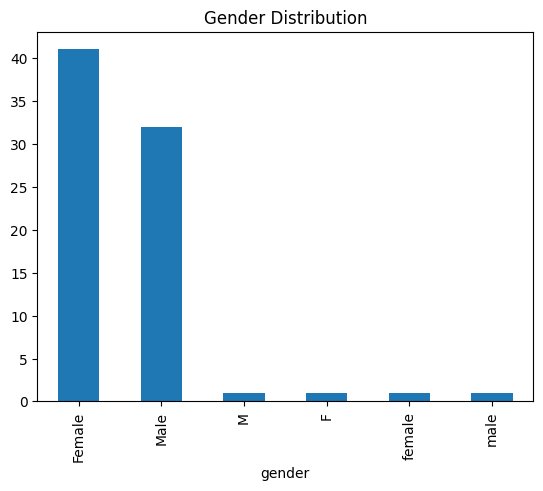

In [23]:
df["gender"].value_counts().plot(kind="bar")
plt.title("Gender Distribution")
plt.show()

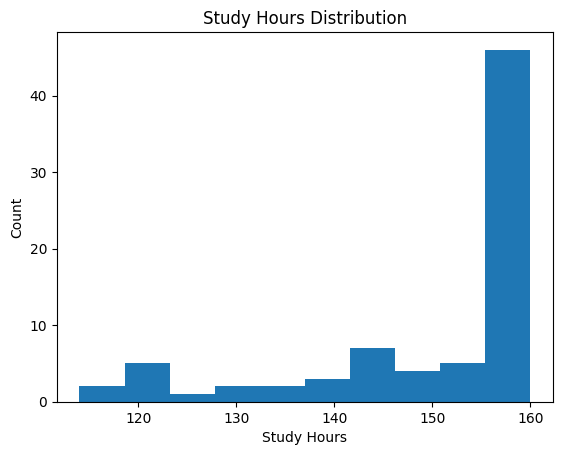

In [24]:
plt.hist(df["studyHOURS"], bins=10)
plt.title("Study Hours Distribution")
plt.xlabel("Study Hours")
plt.ylabel("Count")
plt.show()

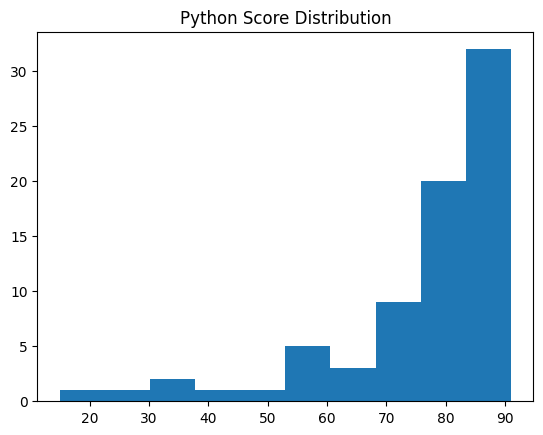

In [25]:
plt.hist(df["Python"].dropna(), bins=10)
plt.title("Python Score Distribution")
plt.show()

In [28]:
# it will handle missing values
df["Python"] = df["Python"].fillna(df["Python"].median())

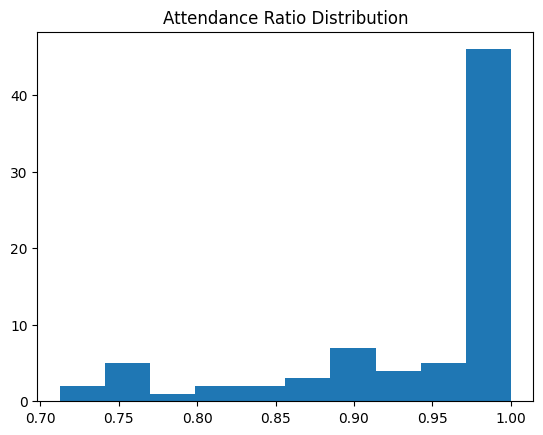

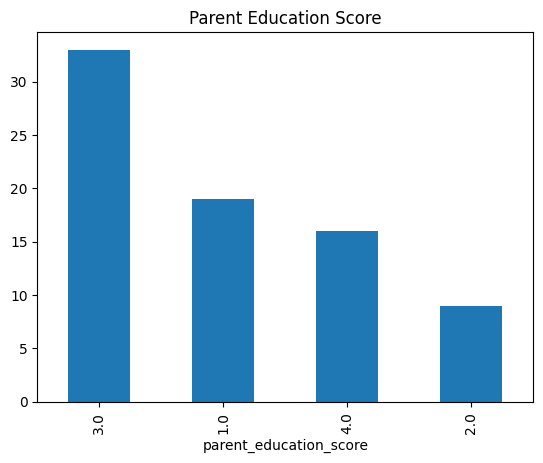

In [32]:
# Feature engineering

# Attendance ratio
df["attendance_ratio"] = df["studyHOURS"] / df["studyHOURS"].max()
plt.hist(df["attendance_ratio"], bins=10)
plt.title("Attendance Ratio Distribution")
plt.show()

# Parent education score
education_map = {
    "HighSchool": 1,
    "High School": 1,
    "Diploma": 2,
    "Bachelors": 3,
    "Masters": 4
}

df["parent_education_score"] = df["prevEducation"].map(education_map)
df["parent_education_score"] = df["parent_education_score"].fillna(
    df["parent_education_score"].mode()[0]
)
df["parent_education_score"].value_counts().plot(kind="bar")
plt.title("Parent Education Score")
plt.show()

In [33]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = df.select_dtypes(include=["object"]).columns
numeric_cols, categorical_cols
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_cols])

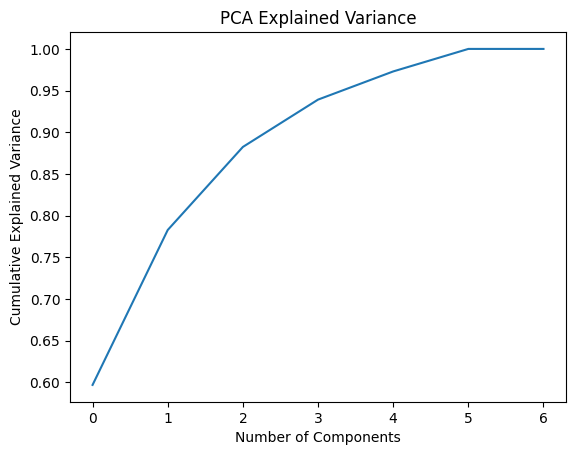

In [35]:
# PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.show()

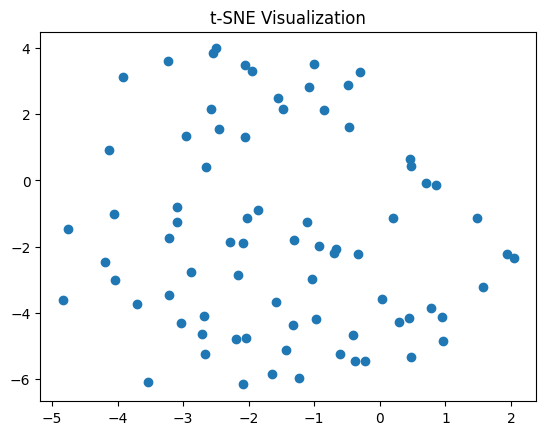

In [36]:
# t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_data = tsne.fit_transform(scaled_data)
plt.scatter(tsne_data[:, 0], tsne_data[:, 1])
plt.title("t-SNE Visualization")
plt.show()

In [38]:
processed_data = pipeline.fit_transform(df)

cleaned_df = pd.DataFrame(processed_data)

cleaned_df.to_csv("cleaned_student_data.csv", index=False)

In [40]:
data = pd.read_csv("//content/cleaned_student_data.csv", encoding="latin1")
data.isna().sum()

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0
